In [1]:
import numpy as np
from Code import *
from Code.environment import *
from Code.data import *

from Code.environment.Environment import Environment

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 10
p_lambda = 0.5
graph_json = "business_full_graph.json"

arms = np.array([
    [4, 8, 16, 32],
    [8, 16, 32, 8],
    [6, 9, 14, 20],
    [15, 20, 25, 30],
    [12, 15, 19, 21]
  ])
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

In [3]:
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

In [4]:
import numpy as np

In [5]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 100

# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

for t in range(TIME_HORIZON):
    super_arm = gr_learner.select_superarm()
    report = environment.round(super_arm)
    gr_learner.update(super_arm.copy(), report)
    prices = [arms[p][a] for p, a in enumerate(super_arm)]


In [6]:
import matplotlib.pyplot as plt


In [7]:
rewards = gr_learner.get_rewards()

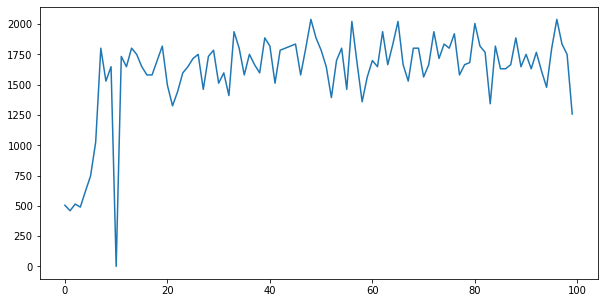

In [8]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.show()

In [9]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )
ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)

In [10]:
percentage_loading = 10
checkpoints = [ckp for ckp in range(0, TIME_HORIZON, int(TIME_HORIZON / percentage_loading))]

In [11]:
for t in range(TIME_HORIZON):
    if t in checkpoints:
        print("{}/{}".format(t, TIME_HORIZON))
    super_arm = ucb1_learner.select_superarm()
    report = environment.round(super_arm)
    ucb1_learner.update(super_arm.copy(), report)

0/100
10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100


C:\Users\mvcim\OneDrive\Desktop\policy compression\OLA_project\Code\UCBLearner.py:31: RuntimeWarning: invalid value encountered in double_scalars
  self.means[product, arm] = (self.means[product, arm] * self.seen[product, arm] + bought[product]) / (tot_seen[product, arm])


In [12]:
rewards = ucb1_learner.history_rewards


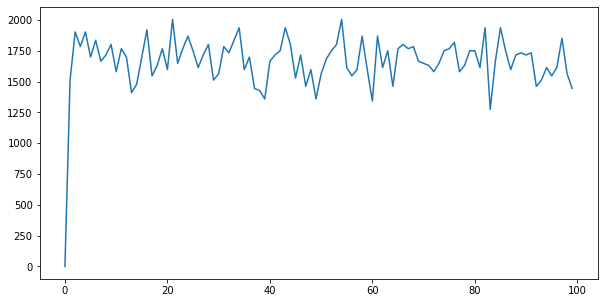

In [13]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.show()


In [14]:
ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)

In [15]:
for t in range(TIME_HORIZON):
    if t in checkpoints:
        print("{}/{}".format(t, TIME_HORIZON))
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

0/100
10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100


In [16]:
rewards = ts_learner.history_rewards


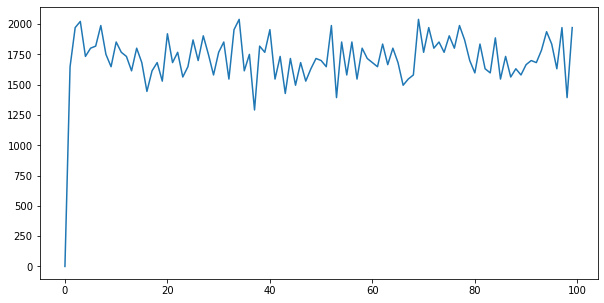

In [17]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.show()
